In [73]:
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
import xarray as xr

from rate_model import RateModelWC

In [ ]:
fpath_in = (r'G:\Мой диск\repo\pytorch_test\data'
            r'\rates_npops_2_nmodels_512_npts_32_seed_113_ws_1_uni_r_0.1_9.9_dt_0.25_nt_100.nc')
X = xr.load_dataset(fpath_in)
X

In [117]:
X

<xarray.Dataset> Size: 1MB
Dimensions:  (model: 512, point: 32, pop: 2, pop_in: 2)
Coordinates:
  * model    (model) int32 2kB 0 1 2 3 4 5 6 7 ... 505 506 507 508 509 510 511
  * point    (point) int32 128B 0 1 2 3 4 5 6 7 8 ... 23 24 25 26 27 28 29 30 31
  * pop      (pop) int32 8B 0 1
  * pop_in   (pop_in) int32 8B 0 1
Data variables:
    H        (model, point, pop) float64 262kB 0.2305 0.2614 ... -3.236 3.248
    R        (model, point, pop) float64 262kB 1.351 5.743 8.337 ... 7.897 4.77
    L_re     (model, point, pop) float64 262kB -0.872 -0.872 ... -0.6289 -2.04
    L_im     (model, point, pop) float64 262kB 0.6329 -0.6329 0.6857 ... 0.0 0.0
    W        (model, pop_in, pop) float64 16kB 0.704 -0.8522 ... 0.0578 -0.8153
Attributes:
    meta:     {"seed": 113, "npops": 2, "n_model_gens": 512, "n_point_gens": ...

In [119]:
W = X['W'].values
R = X['R'].values
H = X['H'].values
JLre = X['L_re'].values

nmats = W.shape[0]
N = 2

# Calculate W eigenvalues
L = np.zeros((nmats, N), dtype=np.complex128)
for n in range(nmats):
    Wn = W[n, :, :]
    L[n, :] = np.linalg.eigvals(Wn)

q = np.mean(np.imag(L[:, 0]) != 0)
print(f'Perc. imag.: {q}')

Perc. imag.: 0.345703125


Text(0, 0.5, 'Im(L1)')

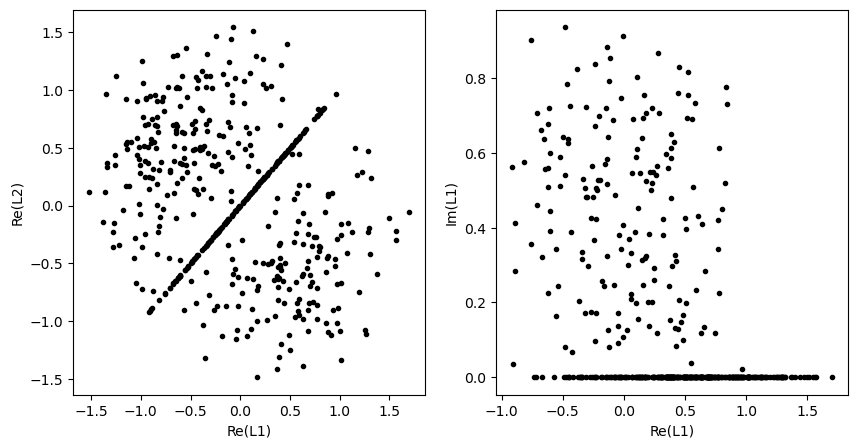

In [111]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(np.real(L[:, 0]), np.real(L[:, 1]), 'k.')
plt.xlabel('Re(L1)')
plt.ylabel('Re(L2)')

plt.subplot(1, 2, 2)
q = np.random.normal(size=(nmats, 2)) * 0.00
plt.plot(np.real(L).max(axis=1) + q[:, 0],
            np.abs(np.imag(L[:, 0])) + q[:, 1], 'k.')
plt.xlabel('Re(L1)')
plt.ylabel('Im(L1)')

In [106]:
lre_max = np.real(L).max(axis=1)
idx = np.argsort(lre_max)[::-1]
idx[:20]


array([234,  64, 384,  16, 153, 210, 380, 183, 132, 271, 332, 500, 364,
       188, 102,  69, 242, 506,   2,  57])

In [132]:
Jlre_max = JLre.max(axis=(1,2))
np.argwhere(Jlre_max[idx] < 0).ravel()[:30]

array([102, 104, 105, 107, 108, 109, 111, 112, 114, 115, 116, 117, 118,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136])

(32, 3)


Text(0, 0.5, 'h2')

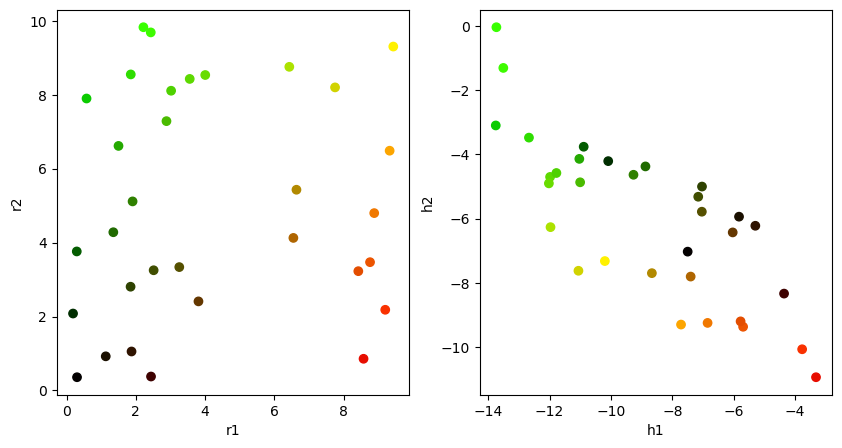

In [112]:
n = idx[5]
Wn = W[n, :, :]
Hn = H[n, :, :]
Rn = R[n, :, :]

plt.figure(figsize=(10, 5))

#cols = np.tile(np.linspace(0, 1, 32).reshape(-1, 1), (1, 3))
#cols = (Hn - Hn.min(axis=0)) / (Hn.max(axis=0) - Hn.min(axis=0))
cols = (Rn - Rn.min(axis=0)) / (Rn.max(axis=0) - Rn.min(axis=0))
cols = np.clip(cols, 0, 1)
cols = np.hstack((cols, np.zeros((cols.shape[0], 1))))
print(cols.shape)


plt.subplot(1, 2, 1)
plt.scatter(Rn[:, 0], Rn[:, 1], c=cols)
plt.xlabel('r1')
plt.ylabel('r2')

plt.subplot(1, 2, 2)
plt.scatter(Hn[:, 0], Hn[:, 1], c=cols)
plt.xlabel('h1')
plt.ylabel('h2')

Text(0, 0.5, 'dr')

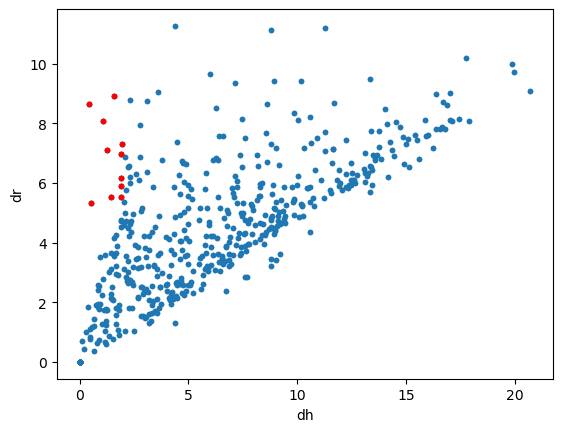

In [200]:
#n = idx[102]
n = idx[20]
Hn = H[n, :, :]
Rn = R[n, :, :]
Wn = W[n, :, :]

Dh = np.linalg.norm(Hn[:, np.newaxis, :] - Hn[np.newaxis, :, :], axis=-1)
Dr = np.linalg.norm(Rn[:, np.newaxis, :] - Rn[np.newaxis, :, :], axis=-1)

mask = (Dh < 2) & (Dr > 5)

plt.figure()
plt.plot(Dh.ravel(), Dr.ravel(), '.')
plt.plot(Dh[mask].ravel(), Dr[mask].ravel(), 'r.')
plt.xlabel('dh')
plt.ylabel('dr')

In [201]:
idx1 = np.argwhere(mask)
m = 0
id0, id1 = idx1[m, 0], idx1[m, 1]
print(f'dh: {Dh[id0, id1]}')
print(f'dr: {Dr[id0, id1]}')
print(f'h[0]: {Hn[id0, 0]}, {Hn[id0, 1]}')
print(f'h[1]: {Hn[id1, 0]}, {Hn[id1, 1]}')
print(f'r[0]: {Rn[id0, 0]}, {Rn[id0, 1]}')
print(f'r[1]: {Rn[id1, 0]}, {Rn[id1, 1]}')

dh: 1.922578983010367
dr: 6.168754516816065
h[0]: -6.9467351566829425, -3.2915568686985877
h[1]: -5.429914235252477, -4.472896886739123
r[0]: 4.3164451318925146, 3.3381011699675556
r[1]: 9.817530736860402, 6.129443043610715


(0.0, 10.0)

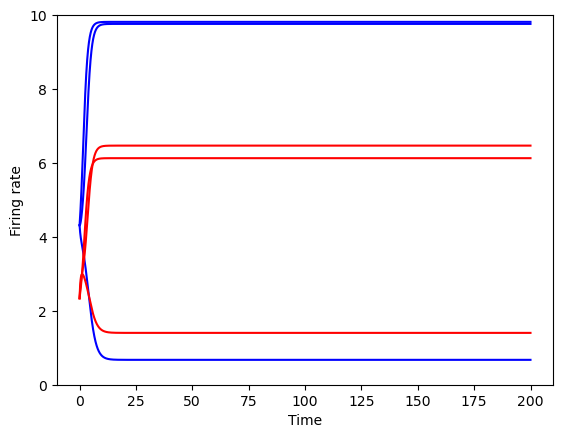

In [205]:
plt.figure()

#for a in np.linspace(0.065, 0.07, 10):
for a in [0, 0.5, 1]:

    h0 = (1 - a) * Hn[id0, :] + a * Hn[id1, :]
    r0 = Rn[id0, :]
    #r0 = np.array([5.65193479, 6.18595433])

    # Initialize the model
    model_par = dict(tau=1, rmax=10, gain_slope=0.5, gain_center=0)
    model = RateModelWC(Wn, **model_par)
    model.sim_res_type = 'full'

    # Simulate the model
    rstart = r0 + np.array([[0, -1]])
    T = 200
    dt = 0.02
    Rsim = model.run(h0, r0=rstart, dt=dt, nsteps=int(T / dt))

    #plt.figure()
    cols = ['b', 'r']
    for pop in range(N):
        plt.plot(Rsim.time, Rsim.sel(pop=pop), cols[pop])
        #plt.plot([Rsim.time.min(), Rsim.time.max()], [r0[pop]] * 2, cols[pop] + '--')

plt.xlabel('Time')
plt.ylabel('Firing rate')
plt.ylim(0, 10)

#J = model.get_J(r0, h0)
#print(np.linalg.eigvals(J))
#print(Rsim.isel(time=-1).values)

Text(0.5, 1.0, 'Nullclines')

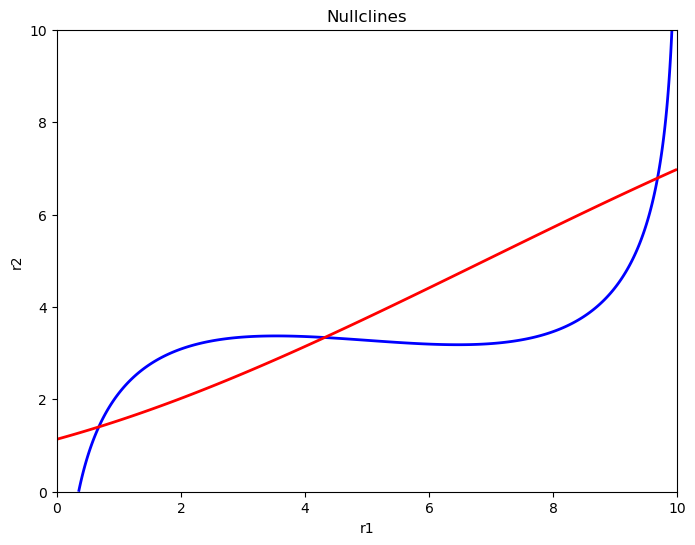

In [206]:
a = 0
h0 = (1 - a) * Hn[id0, :] + a * Hn[id1, :]

# Define the activation (gain) function used in the model dynamics.
def gain(u):
    return model_par['rmax'] / (1 + np.exp(-model_par['gain_slope'] * (u - model_par['gain_center'])))

# Create a grid of firing rates for the two populations.
r0_vals = np.linspace(0, model_par['rmax'], 300)
r1_vals = np.linspace(0, model_par['rmax'], 300)
R0, R1 = np.meshgrid(r0_vals, r1_vals)

# Compute the nullcline functions for each population.
# The dynamics is assumed to be: dr/dt = -r + gain(Wn @ r + h0)
f0 = -R0 + gain(Wn[0, 0] * R0 + Wn[0, 1] * R1 + h0[0])
f1 = -R1 + gain(Wn[1, 0] * R0 + Wn[1, 1] * R1 + h0[1])
#f0 = -R0 + 1 / model.gain_inv(R0, pop_num=0).reshape(R0.shape)
#f1 = -R1 + 1 / model.gain_inv(R1, pop_num=1).reshape(R1.shape)

# Plot the nullclines (contours where f0=0 and f1=0).
plt.figure(figsize=(8, 6))
nullcline0 = plt.contour(R0, R1, f0, levels=[0], colors='b', linewidths=2)
nullcline1 = plt.contour(R0, R1, f1, levels=[0], colors='r', linewidths=2)
plt.xlabel('r1')
plt.ylabel('r2')
plt.title('Nullclines')

In [280]:
mets = {
    're_max': np.max(np.real(L), axis=1),
    're_min': np.min(np.real(L), axis=1),
    'abs_max': np.max(np.abs(L), axis=1),
    'abs_min': np.min(np.abs(L), axis=1),
    'imag': np.abs(np.imag(L[:, 0]))
}
mets['abs_ratio'] = mets['abs_max'] / mets['abs_min']


Text(0, 0.5, 'Rate')

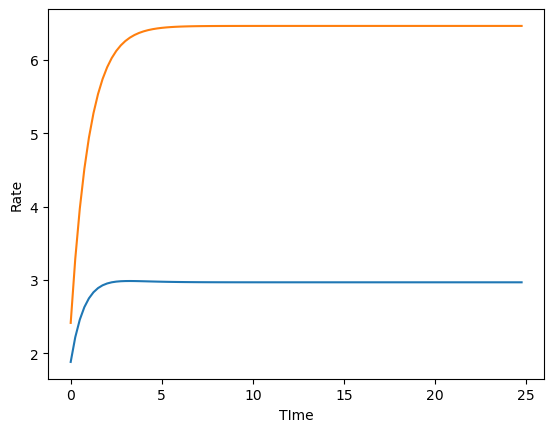

In [295]:
met = 'abs_max'
idx = np.argsort(mets[met])

mask = mets['imag'] > 0
mask = mask[idx]
idx = idx[mask]

W_ = W[idx[-1], :, :]
model = RateModelWC(W_, **model_par)
model.sim_res_type = 'full'

h0 = 1.0 * np.random.randn(N, 1)
r0 = 10 * np.random.rand(N, 1)
R = model.run(h0, r0=r0, **sim_par)
t = R.time.values
R = R.values

plt.figure()
plt.plot(t, R[0, :])
plt.plot(t, R[1, :])
plt.xlabel('TIme')
plt.ylabel('Rate')